<a href="https://colab.research.google.com/github/roderickli1189/Stroke_Detection/blob/main/Stroke_Detection_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def load_into_dataframe(link, filename):
  """
  link: string for shareable link of data file on Google Drive.
  filename: string for name of data file.

  Returns DataFrame for loaded data file.
  """
  id = link.split("/")[-2:-1][0]
  downloaded = drive.CreateFile({'id':id})
  downloaded.GetContentFile(filename)
  df = pd.read_csv(filename, encoding='latin-1')

  return df

In [4]:
# Code for reading data file on Google Drive into Colaboratory #

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
# Load csv file into CoLab and read it as a dataframe.
data_link = 'https://drive.google.com/file/d/13Smle7MOH1JU5xhIeOCsx85R7_cwX5-5/view?usp=sharing' # Right-click on the data file (stored in YOUR PERSONAL Google Drive) and copy link
df = load_into_dataframe(data_link, 'healthcare-dataset-stroke-data.csv')

In [6]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
#Data Preprocessing

In [8]:
pd.isnull(df).sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df['bmi'].mean()

28.893236911794666

In [10]:
#Data Imputation
df['bmi'].fillna(28.89, inplace = True)

In [11]:
pd.isnull(df).sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
df.value_counts(df['stroke'])

stroke
0    4861
1     249
dtype: int64

In [13]:
#Dropping the column id because it isn't needed
df.drop('id', axis = 1 , inplace = True)

In [14]:
#Dropping one row because there is only one instance of the gender Other
df.drop(df.loc[df['gender'] == 'Other'].index, inplace = True)

In [15]:
#Need to reset index after dropping the one row
df.reset_index(drop=True, inplace=True)

In [16]:
#Putting the numbers for bmi and avg_glucose_level into bins
df['bmi'] = pd.cut(df['bmi'], bins = [0, 18.5, 25, 30, 200], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['avg_glucose_level'] = pd.cut(df['avg_glucose_level'], bins = [0, 70, 100, 125, 500], labels = ['Low', 'Normal', 'High', 'Very-High'])

In [17]:
#Then replacing the bin names with numbers in order
df['bmi'] = df['bmi'].replace({'Underweight':0,'Ideal':1, 'Overweight':2, 'Obesity':3}).astype(np.uint8)
df['avg_glucose_level'] = df['avg_glucose_level'].replace({'Low':0,'Normal':1,'High':2,'Very-High':3}).astype(np.uint8)
df['smoking_status'] = df['smoking_status'].replace({'Unknown':0,'never smoked':1,'formerly smoked':2,'smokes':3}).astype(np.uint8)

In [18]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,3,3,2,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,3,2,1,1
2,Male,80.0,0,1,Yes,Private,Rural,2,3,1,1
3,Female,49.0,0,0,Yes,Private,Urban,3,3,3,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,Yes,Private,Urban,1,2,1,0
5105,Female,81.0,0,0,Yes,Self-employed,Urban,3,3,1,0
5106,Female,35.0,0,0,Yes,Self-employed,Rural,1,3,1,0
5107,Male,51.0,0,0,Yes,Private,Rural,3,2,2,0


In [19]:
df_preprocessed = df.copy()

In [20]:
#One hot encoded the gender and ever_married columns
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
feature_arr = ohe.fit_transform(df[['gender', 'ever_married']]).toarray()

In [21]:
feature_labels = ohe.get_feature_names_out()
feature_labels

array(['gender_Female', 'gender_Male', 'ever_married_No',
       'ever_married_Yes'], dtype=object)

In [22]:
#One hot encoded values are in to_add
to_add = pd.DataFrame(feature_arr, columns = feature_labels)

In [23]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,3,3,2,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,3,2,1,1
2,Male,80.0,0,1,Yes,Private,Rural,2,3,1,1
3,Female,49.0,0,0,Yes,Private,Urban,3,3,3,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,Yes,Private,Urban,1,2,1,0
5105,Female,81.0,0,0,Yes,Self-employed,Urban,3,3,1,0
5106,Female,35.0,0,0,Yes,Self-employed,Rural,1,3,1,0
5107,Male,51.0,0,0,Yes,Private,Rural,3,2,2,0


In [24]:
#Dropping work_type and Residence_type because not important in determining stroke
#Dropping gender and ever_married because we want the one hot encoded values instead
df_preprocessed.drop(['gender', 'ever_married', 'work_type', 'Residence_type'], axis = 1 , inplace = True)

In [25]:
#Then concat the changed df with one hot encoded values
df_preprocessed = pd.concat([df_preprocessed.loc[:, 'age':'smoking_status'], to_add, df_preprocessed.loc[:, ['stroke']]], axis = 1)

In [26]:
df_preprocessed

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,ever_married_No,ever_married_Yes,stroke
0,67.0,0,1,3,3,2,0.0,1.0,0.0,1.0,1
1,61.0,0,0,3,2,1,1.0,0.0,0.0,1.0,1
2,80.0,0,1,2,3,1,0.0,1.0,0.0,1.0,1
3,49.0,0,0,3,3,3,1.0,0.0,0.0,1.0,1
4,79.0,1,0,3,1,1,1.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,80.0,1,0,1,2,1,1.0,0.0,0.0,1.0,0
5105,81.0,0,0,3,3,1,1.0,0.0,0.0,1.0,0
5106,35.0,0,0,1,3,1,1.0,0.0,0.0,1.0,0
5107,51.0,0,0,3,2,2,0.0,1.0,0.0,1.0,0


In [27]:
from sklearn.model_selection import train_test_split

#spliting the data
train_df, test_df = train_test_split(df_preprocessed, test_size = 0.4, stratify = df_preprocessed['stroke'])

features = list(df_preprocessed.columns.values)
features.pop()
print(features)


X_train = train_df[features]
y_train = train_df['stroke']

X_test = test_df[features]
y_test = test_df['stroke']

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status', 'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes']


In [28]:
#Scaling data with standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9
0,0.359658,-0.325728,-0.227637,-0.440736,1.095245,0.777904,0.846242,-0.846242,-0.744486,0.744486
1,-0.346270,-0.325728,-0.227637,-0.440736,1.095245,-0.183110,0.846242,-0.846242,-0.744486,0.744486
2,0.933225,-0.325728,-0.227637,-0.440736,-1.032759,-1.144124,-1.181695,1.181695,-0.744486,0.744486
3,0.756743,-0.325728,-0.227637,-1.487911,0.031243,-1.144124,0.846242,-0.846242,-0.744486,0.744486
4,1.683274,3.070044,-0.227637,1.653615,1.095245,-0.183110,0.846242,-0.846242,-0.744486,0.744486
...,...,...,...,...,...,...,...,...,...,...
2039,-0.169788,-0.325728,-0.227637,-0.440736,0.031243,-0.183110,0.846242,-0.846242,-0.744486,0.744486
2040,1.595033,-0.325728,-0.227637,-0.440736,1.095245,-0.183110,0.846242,-0.846242,1.343208,-1.343208
2041,1.065587,-0.325728,-0.227637,-1.487911,1.095245,-0.183110,0.846242,-0.846242,-0.744486,0.744486
2042,-0.125667,-0.325728,-0.227637,-0.440736,-1.032759,0.777904,0.846242,-0.846242,-0.744486,0.744486


In [30]:
from imblearn.over_sampling import SMOTE

#Oversampling with smote
oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)
print(pd.value_counts(y_train))
print(pd.value_counts(y_train_os))

0    2916
1     149
Name: stroke, dtype: int64
0    2916
1    2916
Name: stroke, dtype: int64


In [31]:
from sklearn import metrics

#simple function that just prints out accuracy, precision, and recall of the model results passed in
def model_stats(y_test, y_pred):
  print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
  print("Precision: ", metrics.precision_score(y_test, y_pred))
  print("Recall: ", metrics.recall_score(y_test, y_pred))

In [32]:
#going to quickly make a function to retrain model, print out coefficents, and model stats

def retrain_coef_stats(X, y, x_test):
  logreg_model.fit(X, y) #Feed in our training data - X and y - so the model can learn a function

  coefs = pd.DataFrame(
      data = logreg_model.coef_[0],
      columns = ["Coefficients"],
      index = features
  )

  print(coefs)

  y_pred = logreg_model.predict(x_test) #Get the predictions on our testing data

  model_stats(y_test, y_pred)

In [33]:
from sklearn.linear_model import LogisticRegression

#Training logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_os, y_train_os)


y_pred = logreg_model.predict(X_test)
model_stats(y_test, y_pred)

Accuracy:  0.7431506849315068
Precision:  0.1317157712305026
Recall:  0.76


In [34]:
coefs = pd.DataFrame(
      data = logreg_model.coef_[0],
      columns = ["Coefficients"],
      index = features
  )

#extracting coefficients
print(coefs)

                   Coefficients
age                    2.086499
hypertension           0.000645
heart_disease          0.096978
avg_glucose_level      0.333728
bmi                   -0.012312
smoking_status         0.230183
gender_Female          0.110635
gender_Male           -0.110635
ever_married_No        0.079015
ever_married_Yes      -0.079015


In [35]:
logModel = LogisticRegression()

In [36]:
param_grid = [
    {
        'penalty' : ['l1' , 'l2' , 'elasticnet', 'none'],
        'C' : np.linspace(0, 0.1, 10),
        'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'max_iter' : [100,500]
    }
]

In [37]:
from sklearn.model_selection import GridSearchCV

#performing some tunning using GridSearchCV
gridsearch = GridSearchCV(logModel, param_grid = param_grid, cv = 3, scoring = 'accuracy', verbose = 1, n_jobs = -1)

gridsearch.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
738 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sk

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([0.        , 0.01111111, 0.02222222, 0.03333333, 0.04444444,
       0.05555556, 0.06666667, 0.07777778, 0.08888889, 0.1       ]),
                          'max_iter': [100, 500],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                     'newton-cholesky', 'sag', 'saga']}],
             scoring='accuracy', verbose=1)

In [38]:
logModel = gridsearch.best_estimator_
gridsearch.best_estimator_

LogisticRegression(C=0.011111111111111112, penalty='none')

In [39]:
y_pred = logModel.predict(X_test) #Get the predictions on our testing data

#Seeing the metrics for the new tunned model
model_stats(y_test, y_pred)

Accuracy:  0.7431506849315068
Precision:  0.1317157712305026
Recall:  0.76


In [40]:
from sklearn import metrics
import matplotlib.pyplot as plt

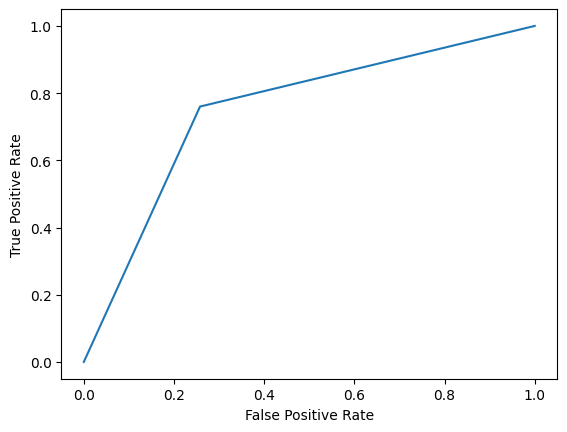

In [41]:
#y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
coefs = pd.DataFrame(
      data = logModel.coef_[0],
      columns = ["Coefficients"],
      index = features
  )

print(coefs)

                   Coefficients
age                    2.094919
hypertension          -0.000219
heart_disease          0.096403
avg_glucose_level      0.334441
bmi                   -0.011761
smoking_status         0.231381
gender_Female          0.110928
gender_Male           -0.110928
ever_married_No        0.080165
ever_married_Yes      -0.080165


In [43]:
print(logModel.intercept_[0])

-1.516228897158679


Performing some odd ratio analysis

For this odd ratio analysis I'm going to use the Logistic regression with multiple predictor variables and no interaction terms. While it is very likely that the variables in my dataset probably do interact with each other to an extent, I don't know for sure if the variables do acatually interact with each other as well as which variables interact with each other.

Somthing also important to note is that we assume all other variables are fixed execpt the variable we are examining.

References: https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

In [44]:
import math

for i,x in enumerate(logModel.coef_[0]):
  print(math.exp(x))

8.124784432813499
0.9997806831913959
1.1012027253530696
1.3971593751213678
0.9883074671939528
1.260338978810258
1.1173150058203056
0.8950027474712234
1.0834656125773274
0.922964225529276


In [45]:
df_preprocessed

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender_Female,gender_Male,ever_married_No,ever_married_Yes,stroke
0,67.0,0,1,3,3,2,0.0,1.0,0.0,1.0,1
1,61.0,0,0,3,2,1,1.0,0.0,0.0,1.0,1
2,80.0,0,1,2,3,1,0.0,1.0,0.0,1.0,1
3,49.0,0,0,3,3,3,1.0,0.0,0.0,1.0,1
4,79.0,1,0,3,1,1,1.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,80.0,1,0,1,2,1,1.0,0.0,0.0,1.0,0
5105,81.0,0,0,3,3,1,1.0,0.0,0.0,1.0,0
5106,35.0,0,0,1,3,1,1.0,0.0,0.0,1.0,0
5107,51.0,0,0,3,2,2,0.0,1.0,0.0,1.0,0


In [52]:
import math
for i in range(0,5):
  num = (math.exp(logModel.coef_[0][i]) - 1) * 100
  if num > 0:
    print("we will see " + str(num) + "% increase in the odds of getting a stroke for a one-unit increase in " + features[i])
  else:
    print("we will see " + str(num) + "% decrease in the odds of getting a stroke for a one-unit increase in " + features[i])

num = (math.exp(logModel.coef_[0][5]) - 1) * 100

print("we will see " + str(num) + "% increase in the odds of getting a stroke for a one-unit increase in smoking")

num = (math.exp(logModel.coef_[0][6]) - 1) * 100
print("we can say the odds for females having a stroke is " + str(num) + "% higher than the odds for males having a stroke")

num = (math.exp(logModel.coef_[0][7]) - 1) * 100
print("we can say the odds for males having a stroke is " + str(num) + "% lower than the odds for females having a stroke")

num = (math.exp(logModel.coef_[0][8]) - 1) * 100
print("we can say the odds for not married having a stroke is " + str(num) + "% higher than the odds for males having a stroke")

num = (math.exp(logModel.coef_[0][9]) - 1) * 100
print("we can say the odds for married having a stroke is " + str(num) + "% lower than the odds for females having a stroke")

we will see 712.4784432813499% increase in the odds of getting a stroke for a one-unit increase in age
we will see -0.021931680860409752% decrease in the odds of getting a stroke for a one-unit increase in hypertension
we will see 10.120272535306963% increase in the odds of getting a stroke for a one-unit increase in heart_disease
we will see 39.715937512136776% increase in the odds of getting a stroke for a one-unit increase in avg_glucose_level
we will see -1.1692532806047207% decrease in the odds of getting a stroke for a one-unit increase in bmi
we will see 26.03389788102579% increase in the odds of getting a stroke for a one-unit increase in smoking
we can say the odds for females having a stroke is 11.731500582030563% higher than the odds for males having a stroke
we can say the odds for males having a stroke is -10.499725252877656% lower than the odds for females having a stroke
we can say the odds for not married having a stroke is 8.346561257732743% higher than the odds for ma

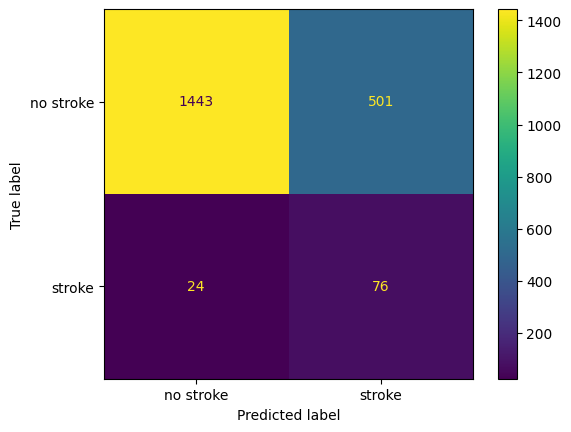

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#plotting confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = logModel.classes_)

cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['no stroke', 'stroke'])

cm_disp.plot()

In [54]:
#Going for undersample and bagging approach

from scipy import stats
nonstroke_train_df = train_df.loc[train_df['stroke'] == 0]
stroke_train_df = train_df.loc[train_df['stroke'] == 1]

y_preds = []
for x in range(0, 100):

  #getting a sample size 149 and then concat it with the stroke df
  nonstroke_train_df_sample = nonstroke_train_df.sample(n = 149)
  result = pd.concat([nonstroke_train_df_sample, stroke_train_df])

  X_train_half = result[features]
  y_train_half = result['stroke']

  #scaling data
  X_train_half = sc.transform(X_train_half)

  #retraining the model and then appending the output into y_preds
  logModel.fit(X_train_half, y_train_half)
  new_y_pred = logModel.predict(X_test)
  y_preds.append(new_y_pred)

#extracting the y_preds and metrics
stacked = np.stack(y_preds)
m = stats.mode(stacked, keepdims = True)
model_stats(y_test, m[0][0])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Accuracy:  0.726027397260274
Precision:  0.1254071661237785
Recall:  0.77


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

In [55]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [56]:
#training svc
svc = SVC()

svc.fit(X_train_os, y_train_os)

y_pred = svc.predict(X_test)
model_stats(y_test, y_pred)

Accuracy:  0.7568493150684932
Precision:  0.11753371868978806
Recall:  0.61


Going to tune SVC

In [57]:
param_grid = {
    'C' : [0.1, 1, 10, 100],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [1, 2, 3]
}

In [58]:
newSVC = SVC()

#hypertuning svc
gridsearch = GridSearchCV(newSVC, param_grid = param_grid, cv = 3, verbose = 1, n_jobs = -1)

gridsearch.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [1, 2, 3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [59]:
newSVC = gridsearch.best_estimator_
gridsearch.best_estimator_

SVC(C=100, degree=1)

In [60]:
y_pred = newSVC.predict(X_test) #Get the predictions on our testing data

model_stats(y_test, y_pred)

Accuracy:  0.7954990215264188
Precision:  0.1025
Recall:  0.41


In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
param_grid = {
    'C' : np.linspace(0.1, 100, 50),
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [1, 2, 3, 4, 5, 6],
}

In [63]:
newSVC = SVC()

#also utilizing RandomizedSearchCV to optimize the SVC model
rand = RandomizedSearchCV(newSVC, param_distributions = param_grid, n_iter = 40, cv = 3)
rand.fit(X_train_os, y_train_os)

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=40,
                   param_distributions={'C': array([  0.1       ,   2.13877551,   4.17755102,   6.21632653,
         8.25510204,  10.29387755,  12.33265306,  14.37142857,
        16.41020408,  18.44897959,  20.4877551 ,  22.52653061,
        24.56530612,  26.60408163,  28.64285714,  30.68163265,
        32.72040816,  34.75918367,  36.79795918,  38.83673469,
        40.8755102 ,  42.91428571,  44.95306122,  46.991...
        49.03061224,  51.06938776,  53.10816327,  55.14693878,
        57.18571429,  59.2244898 ,  61.26326531,  63.30204082,
        65.34081633,  67.37959184,  69.41836735,  71.45714286,
        73.49591837,  75.53469388,  77.57346939,  79.6122449 ,
        81.65102041,  83.68979592,  85.72857143,  87.76734694,
        89.80612245,  91.84489796,  93.88367347,  95.92244898,
        97.96122449, 100.        ]),
                                        'degree': [1, 2, 3, 4, 5, 6],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [64]:
newSVC = rand.best_estimator_
rand.best_params_

{'kernel': 'rbf', 'degree': 5, 'C': 97.96122448979592}

In [65]:
y_pred = newSVC.predict(X_test)
model_stats(y_test, y_pred)

Accuracy:  0.7945205479452054
Precision:  0.10199004975124377
Recall:  0.41


In [66]:
nonstroke_train_df = train_df.loc[train_df['stroke'] == 0]
stroke_train_df = train_df.loc[train_df['stroke'] == 1]

#doing same ensembling technique but to the SVC
y_preds = []
for x in range(0, 100):

  nonstroke_train_df_sample = nonstroke_train_df.sample(n = 149)
  result = pd.concat([nonstroke_train_df_sample, stroke_train_df])

  X_train_half = result[features]
  y_train_half = result['stroke']

  X_train_half = sc.transform(X_train_half)

  newSVC.fit(X_train_half, y_train_half)
  new_y_pred = newSVC.predict(X_test)
  y_preds.append(new_y_pred)

stacked = np.stack(y_preds)
m = stats.mode(stacked, keepdims = True)
model_stats(y_test, m[0][0])

Accuracy:  0.7049902152641878
Precision:  0.11836115326251896
Recall:  0.78


In [67]:
#trying the RandomForestClassifier model
rfc = RandomForestClassifier()
rfc.fit(X_train_os, y_train_os)

y_pred = rfc.predict(X_test)
model_stats(y_test, y_pred)

Accuracy:  0.9026418786692759
Precision:  0.13333333333333333
Recall:  0.18


Tunning RFC model

In [68]:
param_grid = {
    'n_estimators' : np.arange (10, 110, 10),
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [2,4,6,8],
    'min_samples_split' : [2,5],
    'min_samples_leaf' : [1,2]
}

In [69]:
newRFC = RandomForestClassifier()

#tuning the RandomForestClassifier through GridSearchCV
gridsearch = GridSearchCV(newRFC, param_grid = param_grid, cv = 3, verbose = 1, n_jobs = -1)

gridsearch.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             verbose=1)

In [70]:
newRFC = gridsearch.best_estimator_
gridsearch.best_estimator_

RandomForestClassifier(max_depth=8, max_features='auto', min_samples_split=5,
                       n_estimators=50)

In [71]:
y_pred = newRFC.predict(X_test) #Get the predictions on our testing data
model_stats(y_test, y_pred)

Accuracy:  0.8253424657534246
Precision:  0.1400560224089636
Recall:  0.5


In [72]:
nonstroke_train_df = train_df.loc[train_df['stroke'] == 0]
stroke_train_df = train_df.loc[train_df['stroke'] == 1]

#same emsembling technique but on the RandomForestClassifier
y_preds = []
for x in range(0, 100):

  nonstroke_train_df_sample = nonstroke_train_df.sample(n = 149)
  result = pd.concat([nonstroke_train_df_sample, stroke_train_df])

  X_train_half = result[features]
  y_train_half = result['stroke']

  X_train_half = sc.transform(X_train_half)

  newRFC.fit(X_train_half, y_train_half)
  new_y_pred = newRFC.predict(X_test)
  y_preds.append(new_y_pred)

stacked = np.stack(y_preds)
m = stats.mode(stacked, keepdims = True)
model_stats(y_test, m[0][0])

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Accuracy:  0.7103718199608611
Precision:  0.12385321100917432
Recall:  0.81


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [73]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_os, y_train_os)

y_pred = dtc.predict(X_test)
model_stats(y_test, y_pred)

Accuracy:  0.8830724070450098
Precision:  0.11173184357541899
Recall:  0.2


In [74]:
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [2,4,5,6,7,8],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' : [1,2,3,4],
    'max_features' : ['log2', 'sqrt', 'none'],
}

In [75]:
newDTC = DecisionTreeClassifier()

gridsearch = GridSearchCV(newDTC, param_grid = param_grid, cv = 3, verbose = 1, n_jobs = -1)

gridsearch.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1728 fits failed out of a total of 5184.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
833 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _va

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 5, 6, 7, 8],
                         'max_features': ['log2', 'sqrt', 'none'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

In [76]:
newDTC = gridsearch.best_estimator_
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_split=3)

In [77]:
y_pred = newDTC.predict(X_test) #Get the predictions on our testing data
model_stats(y_test, y_pred)

Accuracy:  0.7959882583170255
Precision:  0.135632183908046
Recall:  0.59
